### Importing Libraries

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
 

### Load the Dataset

In [185]:
data=pd.read_csv(r"C:\Users\DANISH\Desktop\EDA\project\tech_gadget_failures.csv")

### Basic Exploration

In [116]:
data.head()

,Failure_ID,Device_Type,Brand,Model_Name,Usage_Duration,Failure_Type,Warranty_Status,Repair_Cost,Customer_Rating,Comments
0,FAIL00001,Smartwatch,Dell,Model-637,47.0,Battery Issue,No,1638.42,1.2,Perfect repair
1,FAIL00002,Gaming Console,OnePlus,Model-873,21.0,Overheating,Yes,3137.30,2.6,Fixed quickly
2,FAIL00003,Smartphone,HP,Model-543,16.0,Screen Crack,No,4252.81,1.1,NaN
3,FAIL00004,Laptop,Sony,Model-352,11.0,Screen Crack,No,3115.47,2.4,Fixed quickly
4,FAIL00005,Gaming Console,OnePlus,Model-538,6.0,Software Crash,Yes,939.52,4.1,Not satisfied


In [117]:
data.tail()

,Failure_ID,Device_Type,Brand,Model_Name,Usage_Duration,Failure_Type,Warranty_Status,Repair_Cost,Customer_Rating,Comments
9995,FAIL09996,Tablet,Apple,Model-856,NaN,Screen Crack,Yes,NaN,NaN,Perfect repair
9996,FAIL09997,Smartwatch,HP,Model-166,25.0,Software Crash,No,2022.88,1.2,Not satisfied
9997,FAIL09998,Smartphone,Apple,Model-379,14.0,Overheating,No,1114.05,1.6,Perfect repair
9998,FAIL09999,Smartphone,Dell,Model-604,8.0,Screen Crack,No,3975.00,4.8,Had to replace
9999,FAIL10000,Smartwatch,Lenovo,Model-447,57.0,Overheating,Yes,750.07,4.3,Perfect repair


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Failure_ID       9500 non-null   object 
 1   Device_Type      10000 non-null  object 
 2   Brand            10000 non-null  object 
 3   Model_Name       10000 non-null  object 
 4   Usage_Duration   9000 non-null   float64
 5   Failure_Type     10000 non-null  object 
 6   Warranty_Status  10000 non-null  object 
 7   Repair_Cost      9000 non-null   float64
 8   Customer_Rating  9000 non-null   float64
 9   Comments         8307 non-null   object 
dtypes: float64(3), object(7)
memory usage: 781.4+ KB


In [119]:
data.describe(include="all")

,Failure_ID,Device_Type,Brand,Model_Name,Usage_Duration,Failure_Type,Warranty_Status,Repair_Cost,Customer_Rating,Comments
count,9500,10000,10000,10000,9000.000000,10000,10000,9000.000000,9000.000000,8307
unique,9500,5,7,899,NaN,5,2,NaN,NaN,5
top,FAIL00001,Tablet,Apple,Model-173,NaN,Screen Crack,Yes,NaN,NaN,Fixed quickly
freq,1,2060,1477,21,NaN,2021,5007,NaN,NaN,1721
mean,NaN,NaN,NaN,NaN,29.651222,NaN,NaN,2559.908880,3.029633,NaN
std,NaN,NaN,NaN,NaN,17.113799,NaN,NaN,1419.756016,1.155661,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,100.390000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,1341.677500,2.000000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,2555.065000,3.000000,NaN
75%,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,3788.210000,4.000000,NaN


In [120]:
data.shape

(10000, 10)

### Checking null values

In [122]:
data.isnull().sum()

Failure_ID          500
Device_Type           0
Brand                 0
Model_Name            0
Usage_Duration     1000
Failure_Type          0
Warranty_Status       0
Repair_Cost        1000
Customer_Rating    1000
Comments           1693
dtype: int64

### Checking Duplicate Rows

In [123]:
data.duplicated().sum()

0

## lets clear the null values

### 1.Failure_ID

In [124]:
data.dropna(subset=["Failure_ID"],inplace=True)

In [125]:
data.shape

(9500, 10)

In [126]:
data.isnull().sum()

Failure_ID            0
Device_Type           0
Brand                 0
Model_Name            0
Usage_Duration      949
Failure_Type          0
Warranty_Status       0
Repair_Cost         949
Customer_Rating     949
Comments           1618
dtype: int64

### 2.Usage Duration

In [127]:
data["Usage_Duration"]

0       47.0
1       21.0
2       16.0
3       11.0
4        6.0
        ... 
9995     NaN
9996    25.0
9997    14.0
9998     8.0
9999    57.0
Name: Usage_Duration, Length: 9500, dtype: float64

In [128]:
#fill the null values using mean
mean=data["Usage_Duration"].mean().round()
mean

30.0

In [129]:
data["Usage_Duration"].fillna(mean,inplace=True)

In [130]:
data["Usage_Duration"].isnull().sum()

0

### 3.Repair Cost

In [131]:
data["Repair_Cost"]

0       1638.42
1       3137.30
2       4252.81
3       3115.47
4        939.52
         ...   
9995        NaN
9996    2022.88
9997    1114.05
9998    3975.00
9999     750.07
Name: Repair_Cost, Length: 9500, dtype: float64

In [132]:
#lets fill the nan values using median
median=data["Repair_Cost"].median()
median

2556.98

In [133]:
data["Repair_Cost"].fillna(median,inplace=True)

In [134]:
data["Repair_Cost"].isna().sum()

0

### 4.Customer Ratings

In [135]:
data["Customer_Rating"]

0       1.2
1       2.6
2       1.1
3       2.4
4       4.1
       ... 
9995    NaN
9996    1.2
9997    1.6
9998    4.8
9999    4.3
Name: Customer_Rating, Length: 9500, dtype: float64

In [136]:
#lets fill the nan values using ffill
data["Customer_Rating"].ffill(inplace=True)

In [137]:
data["Customer_Rating"].isnull().sum()

0

### 5.Comments

In [138]:
data["Comments"]

0       Perfect repair
1        Fixed quickly
2                  NaN
3        Fixed quickly
4        Not satisfied
             ...      
9995    Perfect repair
9996     Not satisfied
9997    Perfect repair
9998    Had to replace
9999    Perfect repair
Name: Comments, Length: 9500, dtype: object

In [109]:
#lets fix null values using bfill

In [139]:
data["Comments"].bfill(inplace=True)

In [140]:
data["Comments"].isnull().sum()

0

## checking null values after filling it

In [141]:
data.isnull().sum()

Failure_ID         0
Device_Type        0
Brand              0
Model_Name         0
Usage_Duration     0
Failure_Type       0
Warranty_Status    0
Repair_Cost        0
Customer_Rating    0
Comments           0
dtype: int64

In [142]:
data.to_csv("cleaned_tech.csv")

## Loading new Cleaned Dataset for further analysis 

In [194]:
data=pd.read_csv("cleaned_tech.csv")

In [196]:
data.head(1)

,Unnamed: 0,Failure_ID,Device_Type,Brand,Model_Name,Usage_Duration,Failure_Type,Warranty_Status,Repair_Cost,Customer_Rating,Comments
0,0,FAIL00001,Smartwatch,Dell,Model-637,47.0,Battery Issue,No,1638.42,1.2,Perfect repair


### lets drop Unnamed: 0 from the dataset

In [197]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [424]:
data.head(1)

,Failure_ID,Device_Type,Brand,Model_Name,Usage_Duration,Failure_Type,Warranty_Status,Repair_Cost,Customer_Rating,Comments
0,FAIL00001,Smartwatch,Dell,Model-637,47.0,Battery Issue,No,1638.42,1.2,Perfect repair


# Basic Understanding

## 1.How many missing values are present in each column?

Failure_ID          500
Device_Type           0
Brand                 0
Model_Name            0
Usage_Duration     1000
Failure_Type          0
Warranty_Status       0
Repair_Cost        1000
Customer_Rating    1000
Comments           1693

## 2.What are the top 5 most frequently reported Failure_Type values?

In [199]:
data["Failure_Type"].value_counts().sort_values(ascending=False)

Failure_Type
Overheating            1916
Screen Crack           1912
Speaker Malfunction    1911
Software Crash         1890
Battery Issue          1871
Name: count, dtype: int64

## 3.What is the distribution of Device_Type in the dataset?

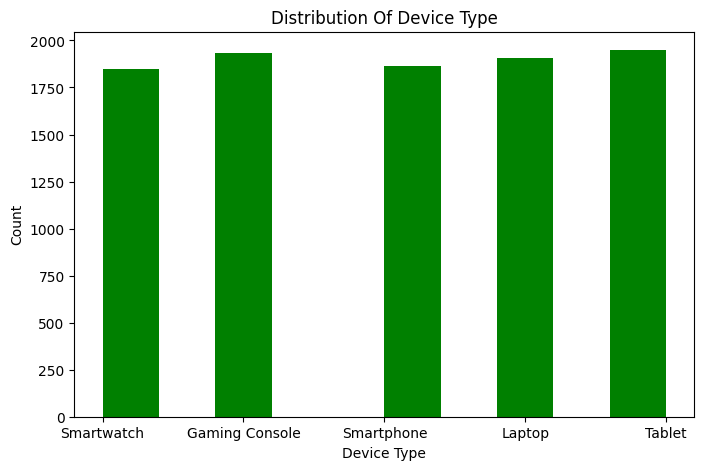

In [490]:
plt.figure(figsize=(8,5))
plt.hist(data["Device_Type"],color="green")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.title("Distribution Of Device Type")
plt.show()

## 4.Which Brand has the highest number of reported failures?

In [201]:
data.groupby("Brand")["Failure_ID"].count().sort_values(ascending=False)

Brand
Apple      1401
OnePlus    1394
Sony       1362
Dell       1360
Lenovo     1348
Samsung    1336
HP         1299
Name: Failure_ID, dtype: int64

<Axes: xlabel='Brand'>

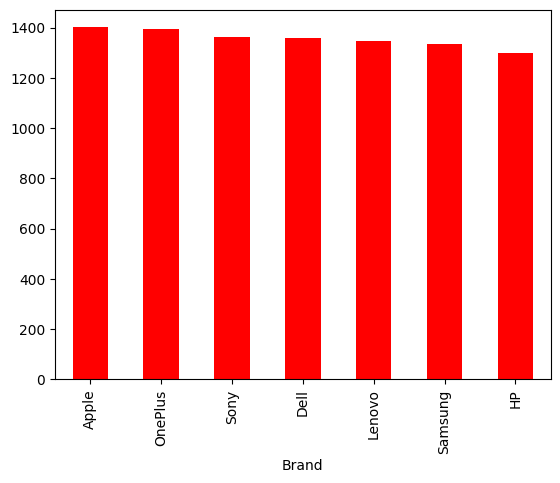

In [511]:
data.groupby("Brand")["Failure_ID"].count().sort_values(ascending=False).plot(kind="bar",color="red")

## 5.What percentage of failures occurred while the device was under warranty?

In [226]:
total_failures=data["Failure_ID"].count()
total_failures

9500

In [227]:
failures_under_warranty = data[data['Warranty_Status'] == 'Yes'].shape[0]
failures_under_warranty

4753

In [220]:
percentage_under_warranty = (failures_under_warranty / total_failures) * 100
percentage_under_warranty

50.031578947368416

In [425]:
print(f"Percentage of failures occured while the device was under warranty : {percentage_under_warranty :.2f}%")

Percentage of failures occured while the device was under warranty : 50.03%


# Numerical Analysis

## 6.What is the average Usage_Duration before a device fails

In [429]:
average_usage_before_failure = data["Usage_Duration"].mean()

print(f"Average Usage Duration before failure: {average_usage_before_failure:.2f} Months")

Average Usage Duration before failure: 29.71 Months


## 7.What is the distribution of Repair_Cost across different Device_Type values

In [238]:
data.groupby("Device_Type")["Repair_Cost"].sum().sort_values(ascending=False)

Device_Type
Tablet            5044378.05
Gaming Console    4924495.75
Laptop            4871749.97
Smartwatch        4767509.51
Smartphone        4724830.47
Name: Repair_Cost, dtype: float64

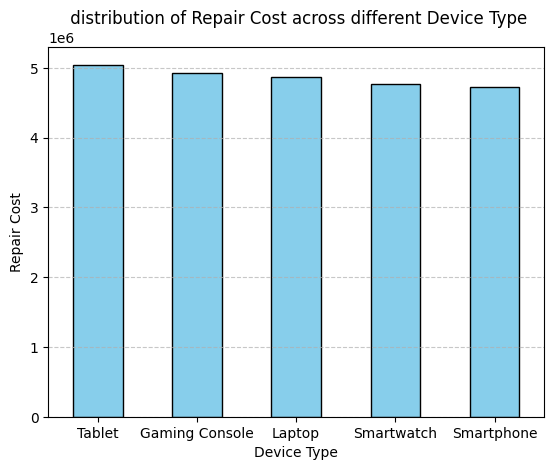

In [506]:
data.groupby("Device_Type")["Repair_Cost"].sum().sort_values(ascending=False).plot(kind="bar",color="skyblue",edgecolor="black")
plt.title(" distribution of Repair Cost across different Device Type")
plt.xlabel("Device Type")
plt.ylabel("Repair Cost")
plt.xticks(rotation=360)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

## 8.Which Brand has the highest average Repair_Cost?

In [264]:
data.groupby("Brand")["Repair_Cost"].mean().sort_values(ascending=False)[:1]

Brand
Dell    2598.587493
Name: Repair_Cost, dtype: float64

## 9.Are there any outliers in the Repair_Cost column?

<Axes: ylabel='Repair_Cost'>

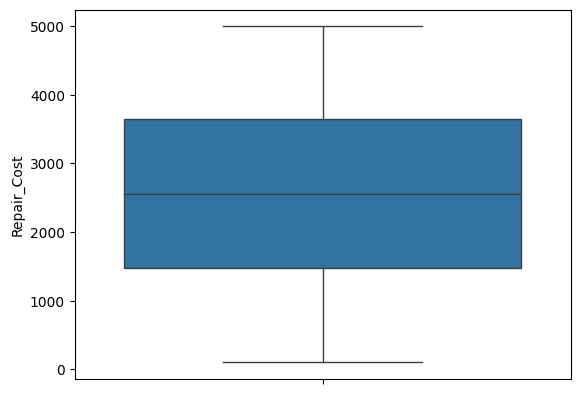

In [268]:
sns.boxplot(data["Repair_Cost"]) #no outliers

## 10.What is the relationship between Usage_Duration and Repair_Cost?

In [288]:
correlation=data["Usage_Duration"].corr(data["Repair_Cost"])
print(correlation)

7.411127475561897e-05


In [430]:
data.groupby("Usage_Duration")["Repair_Cost"].sum().sort_values(ascending=False).head(10)

Usage_Duration
30.0    2779959.03
22.0     459235.21
15.0     446659.09
11.0     443439.03
55.0     418199.01
21.0     417144.51
17.0     414333.35
32.0     411874.28
5.0      408982.91
58.0     408885.85
Name: Repair_Cost, dtype: float64

# Categorical Analysis

## 11.Which Device_Type has the highest failure count?

In [304]:
data.groupby("Device_Type")["Failure_ID"].count().sort_values(ascending=False).head(1)

Device_Type
Tablet    1949
Name: Failure_ID, dtype: int64

## 12.What are the most common failure types for each Device_Type?


In [315]:
data.groupby(["Device_Type","Failure_Type"])["Failure_ID"].count()

Device_Type     Failure_Type       
Gaming Console  Battery Issue          376
                Overheating            417
                Screen Crack           362
                Software Crash         382
                Speaker Malfunction    394
Laptop          Battery Issue          375
                Overheating            354
                Screen Crack           390
                Software Crash         421
                Speaker Malfunction    367
Smartphone      Battery Issue          401
                Overheating            354
                Screen Crack           361
                Software Crash         369
                Speaker Malfunction    378
Smartwatch      Battery Issue          359
                Overheating            387
                Screen Crack           353
                Software Crash         356
                Speaker Malfunction    395
Tablet          Battery Issue          360
                Overheating            404
                Sc

In [495]:
data.groupby(["Device_Type", "Failure_Type"])["Failure_ID"].count().reset_index().sort_values(["Device_Type", "Failure_ID"], ascending=[True,False]).groupby("Device_Type").head(1)


,Device_Type,Failure_Type,Failure_ID
1,Gaming Console,Overheating,417
8,Laptop,Software Crash,421
10,Smartphone,Battery Issue,401
19,Smartwatch,Speaker Malfunction,395
22,Tablet,Screen Crack,446


## 13.What is the most frequent Failure_Type for devices under warranty?

In [347]:
data.groupby(["Failure_Type","Warranty_Status"])["Failure_ID"].count()

Failure_Type         Warranty_Status
Battery Issue        No                 935
                     Yes                936
Overheating          No                 923
                     Yes                993
Screen Crack         No                 945
                     Yes                967
Software Crash       No                 972
                     Yes                918
Speaker Malfunction  No                 972
                     Yes                939
Name: Failure_ID, dtype: int64

In [360]:
warranty_failures=data[data["Warranty_Status"]=="Yes"]
warranty_failures

,Failure_ID,Device_Type,Brand,Model_Name,Usage_Duration,Failure_Type,Warranty_Status,Repair_Cost,Customer_Rating,Comments
1,FAIL00002,Gaming Console,OnePlus,Model-873,21.0,Overheating,Yes,3137.30,2.6,Fixed quickly
4,FAIL00005,Gaming Console,OnePlus,Model-538,6.0,Software Crash,Yes,939.52,4.1,Not satisfied
6,FAIL00007,Laptop,OnePlus,Model-274,19.0,Speaker Malfunction,Yes,1340.16,2.5,Very bad service
9,FAIL00012,Gaming Console,Lenovo,Model-844,10.0,Overheating,Yes,1970.02,3.5,Very bad service
10,FAIL00013,Laptop,Dell,Model-637,55.0,Speaker Malfunction,Yes,1789.92,2.8,Not satisfied
...,...,...,...,...,...,...,...,...,...,...
9491,FAIL09992,Tablet,Sony,Model-633,17.0,Speaker Malfunction,Yes,1905.94,4.9,Had to replace
9492,FAIL09993,Laptop,Dell,Model-168,21.0,Battery Issue,Yes,3186.38,1.8,Not satisfied
9493,FAIL09994,Smartphone,OnePlus,Model-864,11.0,Software Crash,Yes,2517.85,4.7,Perfect repair
9495,FAIL09996,Tablet,Apple,Model-856,30.0,Screen Crack,Yes,2556.98,1.5,Perfect repair


In [362]:
warranty_failures.groupby("Failure_Type")["Failure_ID"].count()

Failure_Type
Battery Issue          936
Overheating            993
Screen Crack           967
Software Crash         918
Speaker Malfunction    939
Name: Failure_ID, dtype: int64

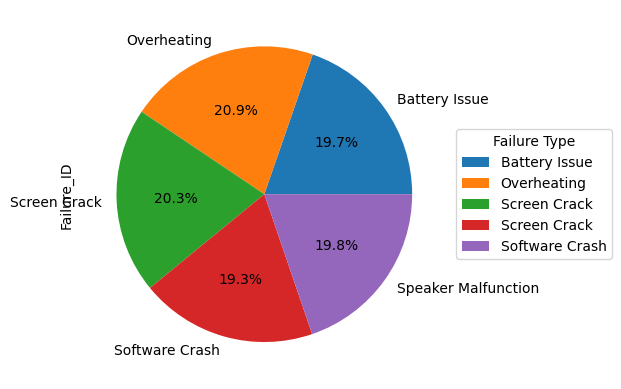

In [380]:
warranty_failures.groupby("Failure_Type")["Failure_ID"].count().plot(kind="pie",autopct="%0.1f%%")
plt.legend(data["Failure_Type"],loc="center left",title="Failure Type",
bbox_to_anchor=(1, 0, 0.5, 1))


## 14.Does Warranty_Status affect the likelihood of a high Repair_Cost?

In [381]:
data.groupby("Warranty_Status")["Repair_Cost"].mean()

Warranty_Status
No     2565.559286
Yes    2557.175220
Name: Repair_Cost, dtype: float64

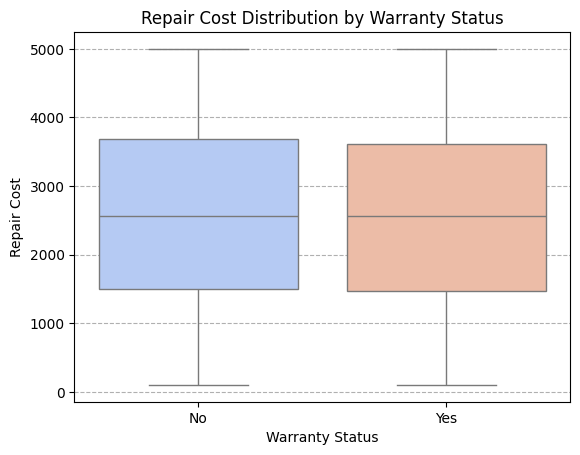

In [493]:
sns.boxplot(x="Warranty_Status", y="Repair_Cost", data=data, palette="coolwarm")
plt.title("Repair Cost Distribution by Warranty Status")
plt.xlabel("Warranty Status")
plt.ylabel("Repair Cost")
plt.grid(axis="y", linestyle="--")
plt.show()

## 15.Which failure type is most common among the top 3 most expensive repairs?

The nlargest(n, columns) function in Pandas is used to retrieve the top n rows based on the highest values in a specified column. 
It is much faster than sorting the entire DataFrame and selecting the top rows manually.

In [394]:
top_3_expensive = data.nlargest(3, "Repair_Cost")
top_3_expensive

,Failure_ID,Device_Type,Brand,Model_Name,Usage_Duration,Failure_Type,Warranty_Status,Repair_Cost,Customer_Rating,Comments
8584,FAIL09043,Laptop,HP,Model-916,24.0,Screen Crack,No,4998.82,2.7,Very bad service
9447,FAIL09946,Gaming Console,OnePlus,Model-388,46.0,Screen Crack,Yes,4998.59,4.4,Fixed quickly
384,FAIL00402,Smartwatch,Dell,Model-687,49.0,Screen Crack,No,4998.24,2.8,Very bad service


In [431]:
top_3_expensive["Failure_Type"].value_counts().idxmax()#idxmax() returns the index of the highest value in a Series or DataFrame column.

'Screen Crack'

# Customer Satisfaction & Insights

## 16.What is the distribution of Customer_Rating? Are there more positive or negative ratings?

In [399]:
data.columns

Index(['Failure_ID', 'Device_Type', 'Brand', 'Model_Name', 'Usage_Duration',
       'Failure_Type', 'Warranty_Status', 'Repair_Cost', 'Customer_Rating',
       'Comments'],
      dtype='object')

In [406]:
data["Customer_Rating"].value_counts()

Customer_Rating
4.1    274
4.4    274
4.3    272
2.9    270
2.4    255
3.1    254
4.9    253
4.0    252
2.5    251
1.3    251
1.6    248
3.0    248
3.7    247
2.7    247
3.5    246
4.8    246
3.3    246
3.9    242
1.8    242
3.6    242
1.5    241
4.5    240
1.4    240
1.9    239
1.7    236
2.1    230
4.7    227
3.2    224
1.2    223
3.8    219
4.2    218
3.4    217
4.6    216
2.3    214
1.1    212
2.8    210
2.2    209
2.6    203
2.0    199
5.0    125
1.0     98
Name: count, dtype: int64

In [412]:
Customer_Rating_int=data["Customer_Rating"].astype(int)
Customer_Rating_int.value_counts().sort_index(ascending=True)

Customer_Rating
1    2230
2    2288
3    2385
4    2472
5     125
Name: count, dtype: int64

<Axes: ylabel='count'>

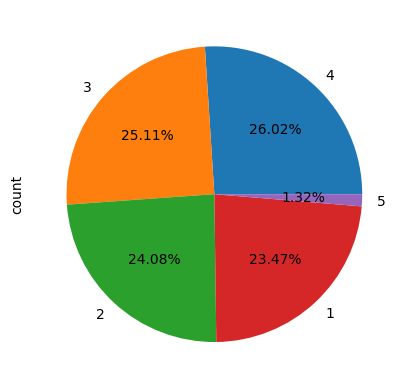

In [413]:
Customer_Rating_int.value_counts().plot(kind="pie",autopct="%.02f%%")

## 17.Which Brand has the best average Customer_Rating post-repair?

In [433]:
data.groupby("Brand")["Customer_Rating"].mean().sort_values(ascending=False)

Brand
HP         3.090839
Lenovo     3.069288
Samsung    3.046632
Sony       3.016593
Dell       3.004632
Apple      3.003712
OnePlus    2.977618
Name: Customer_Rating, dtype: float64

## 18.Create a word cloud from the Comments column to highlight frequently occurring words in customer feedback.

In [452]:
#import library
from wordcloud import WordCloud

In [498]:
# Combining all comments into a single text
text = " ".join(str(comment) for comment in data["Comments"])

In [485]:
# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="magma", max_words=100).generate(text)

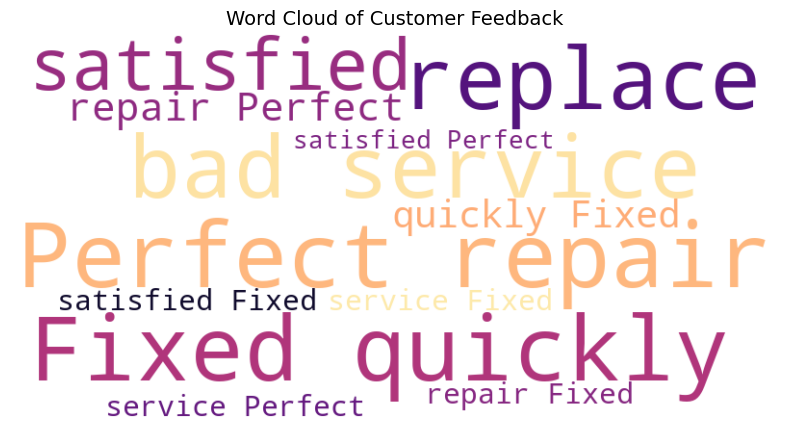

In [488]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Customer Feedback", fontsize=14)
plt.show()

In [491]:
#The most frequent words appear larger, while less frequent ones appear smaller.